In [1]:
import phygnn
import pandas as pd
import numpy as np
import Global_Functions as gf
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
OPEN_FOLDER = '../Data/Preped_Data'

In [3]:
ex_1 = gf.open_CSV_file('experiment_1_short.csv', OPEN_FOLDER)
ex_4 = gf.open_CSV_file('experiment_4_short.csv', OPEN_FOLDER)
ex_9 = gf.open_CSV_file('experiment_9_short.csv', OPEN_FOLDER)
ex_20 = gf.open_CSV_file('experiment_20_short.csv', OPEN_FOLDER)
ex_21 = gf.open_CSV_file('experiment_21_short.csv', OPEN_FOLDER)
ex_22 = gf.open_CSV_file('experiment_22_short.csv', OPEN_FOLDER)
ex_23 = gf.open_CSV_file('experiment_23_short.csv', OPEN_FOLDER)
ex_24 = gf.open_CSV_file('experiment_24_short.csv', OPEN_FOLDER)

In [4]:
X_train = ex_20['input_voltage']
y_train = ex_20['el_power']
p_train = ex_20['spinning_ist']
X_train = pd.DataFrame(X_train.append(ex_21['input_voltage']))
y_train = pd.DataFrame(y_train.append(ex_21['el_power']))
p_train = pd.DataFrame(p_train.append(ex_21['spinning_ist']))

In [20]:
X_test = pd.DataFrame(ex_24['input_voltage'])
y_test = pd.DataFrame(ex_24['el_power'])
p_test = pd.DataFrame(ex_24['spinning_ist'])

In [21]:
func = phygnn.p_fun_dummy

In [22]:
func

<function phygnn.phygnn.p_fun_dummy(model, y_true, y_predicted, p)>

In [23]:
model_without = phygnn.PhysicsGuidedNeuralNetwork(p_fun = func, loss_weights=(0.99,0.001),metric = 'mse')

In [24]:
model_without.fit(X_train, y_train, p_train, shuffle = False, validation_split = 0.1, n_epoch = 500)

In [25]:
preds = model_without.predict(X_test)

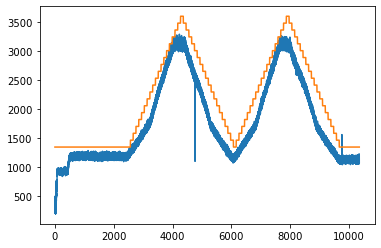

In [31]:
plt.plot(y_test)
plt.plot(preds*5)